# Library

In [30]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

# Data dan Visualisasi

In [5]:
df = pd.read_csv('./Benchmark GRBDB.csv', sep=';', index_col='No')
df.head()

,Iterasi,Endpoint,Methods,Postgre SQL,Postman One Time,Postman Continue
No,,,,,,
1,1,showAllBooks,GET,136,69,4
2,2,showAllBooks,GET,63,65,6
3,3,showAllBooks,GET,74,73,5
4,4,showAllBooks,GET,52,63,5
5,5,showAllBooks,GET,40,71,5


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Iterasi,219.0,10.456621,5.756663,1.0,5.5,10.0,15.0,20.0
Postgre SQL,219.0,59.123288,17.697467,34.0,47.0,59.0,67.0,169.0
Postman One Time,219.0,89.146119,23.361865,61.0,73.5,86.0,95.0,195.0
Postman Continue,219.0,9.885845,12.717132,4.0,5.0,6.0,8.0,71.0


Text(0.5, 1.0, 'Persebaran Runtime')

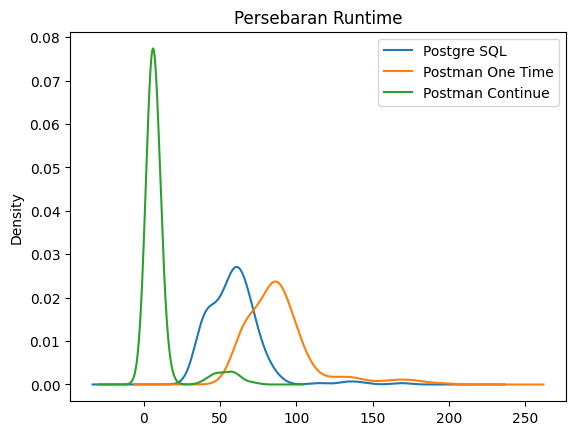

In [31]:
df.drop(columns=['Iterasi']).plot(kind='density', legend=True)
plt.title("Persebaran Runtime")

<Axes: >

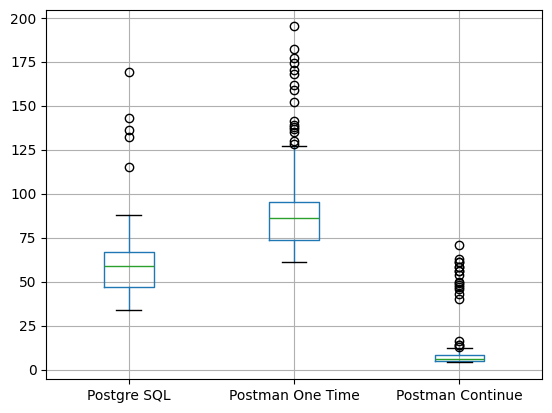

In [24]:
df.drop(columns=['Iterasi']).boxplot()

Text(0.5, 1.0, 'Persebaran Runtime GET')

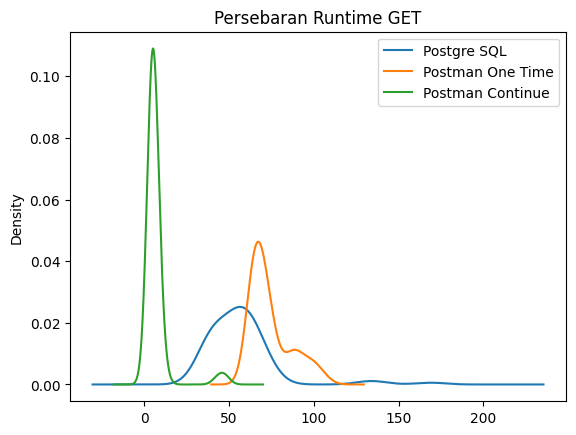

In [38]:
df_get = df[df['Methods'] == 'GET']
df_get.drop(columns=['Iterasi']).plot(kind='density', legend=True)
plt.title("Persebaran Runtime GET")

Text(0.5, 1.0, 'Persebaran Runtime POST')

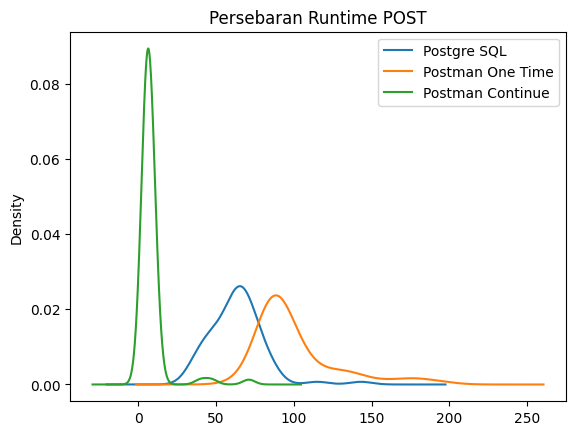

In [64]:
df_post = df[df['Methods'] == 'POST']
df_post.drop(columns=['Iterasi']).plot(kind='density', legend=True)
plt.title("Persebaran Runtime POST")

Text(0.5, 1.0, 'Persebaran Runtime PUT')

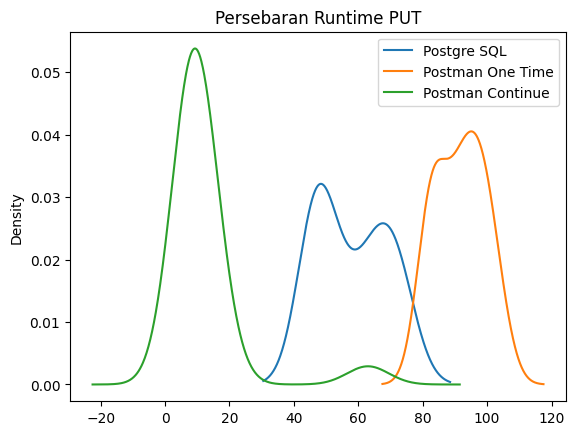

In [65]:
df_put = df[df['Methods'] == 'PUT']
df_put.drop(columns=['Iterasi']).plot(kind='density', legend=True)
plt.title("Persebaran Runtime PUT")

Text(0.5, 1.0, 'Persebaran Runtime DELETE')

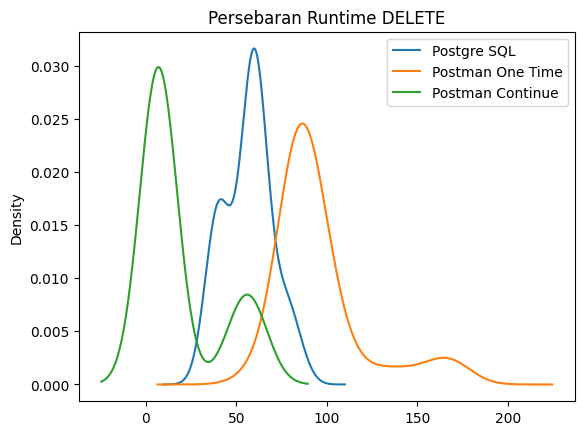

In [66]:
df_delete = df[df['Methods'] == 'DELETE']
df_delete.drop(columns=['Iterasi']).plot(kind='density', legend=True)
plt.title("Persebaran Runtime DELETE")

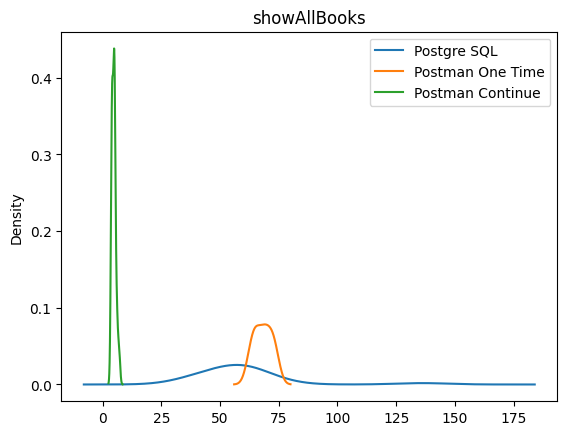

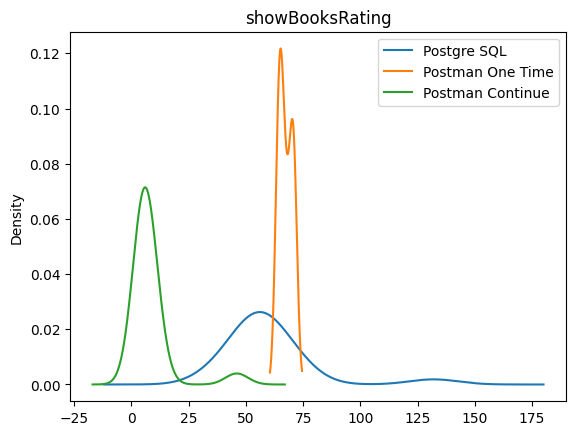

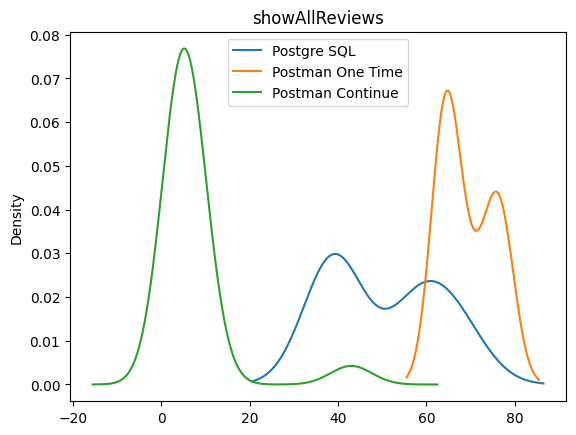

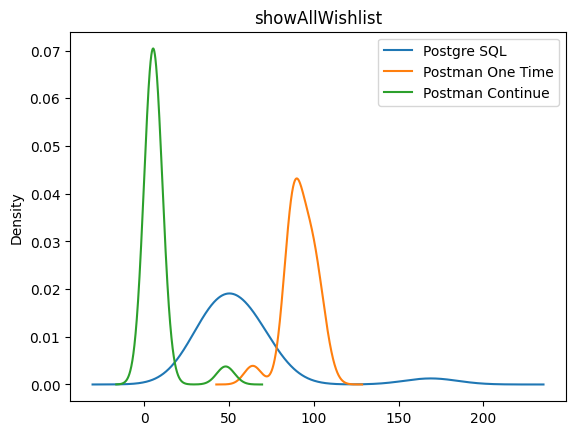

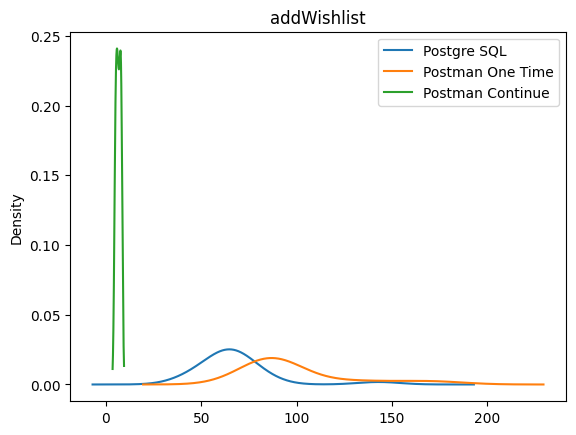

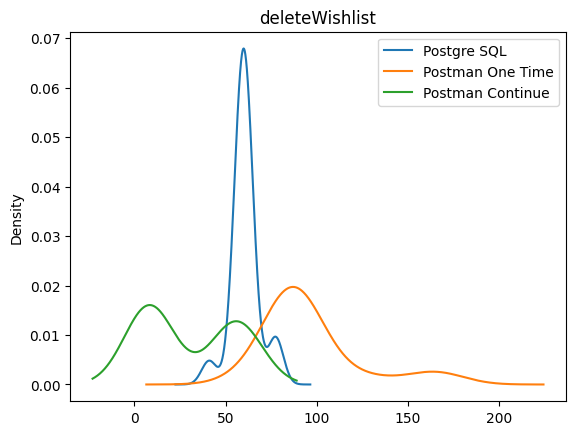

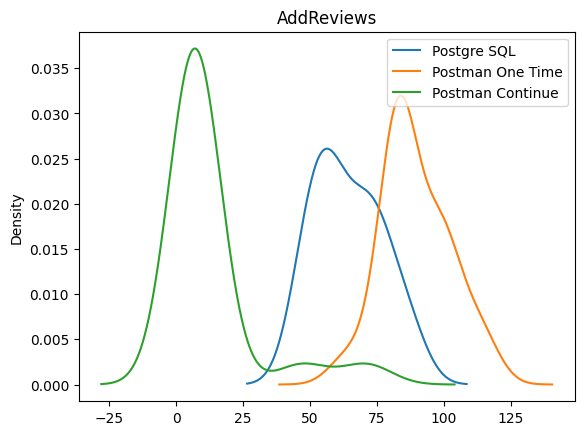

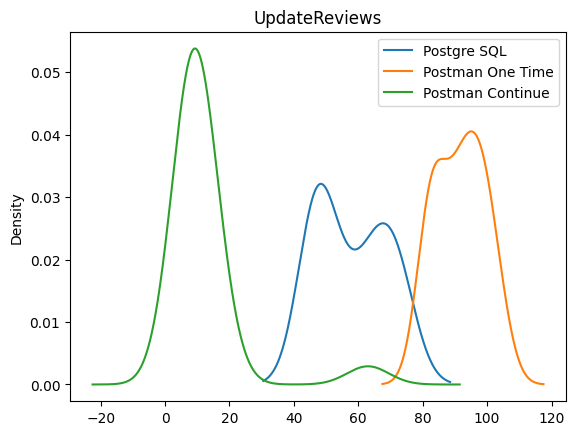

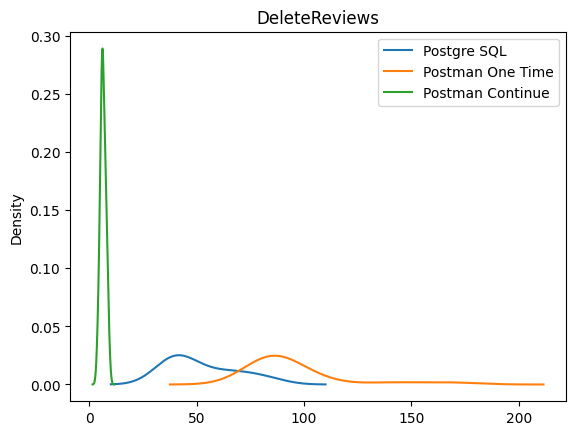

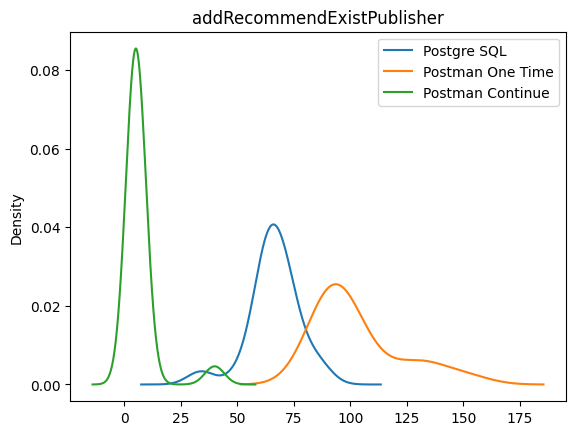

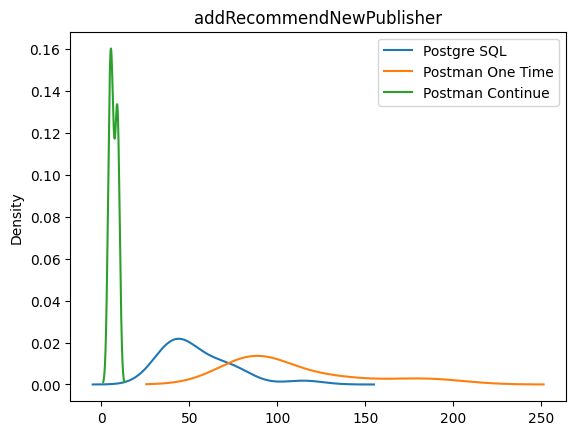

In [63]:
unique_endpoint = df['Endpoint'].unique()
for i in unique_endpoint:
    df[df['Endpoint'] == i].drop(columns='Iterasi').plot(kind='density', legend=True)
    plt.title(i)
    plt.show()
    # df_endpoint[i] = df[df['Endpoint'] == i]

# Mean Paired T Test antara cara pengiriman

In [43]:
data1 = df['Postman One Time']
data2 = df['Postgre SQL']
t_stat, p_value_two_tailed = stats.ttest_rel(data1, data2)
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value (one-tailed): {p_value_one_tailed}")
if p_value_one_tailed < alpha:
    print("Hasil: Menolak hipotesis nol. Mean data Postman One Time lebih besar daripada mean data Postgre SQL.")
else:
    print("Hasil: Tidak dapat menolak hipotesis nol. Tidak ada bukti yang cukup bahwa mean data 'data1' lebih besar daripada mean data 'data2'.")

T-statistic: 15.38912275068578
P-value (one-tailed): 5.725443474852156e-37
Hasil: Menolak hipotesis nol. Mean data Postman One Time lebih besar daripada mean data Postgre SQL.


In [44]:
data1 = df['Postgre SQL']
data2 = df['Postman Continue']
t_stat, p_value_two_tailed = stats.ttest_rel(data1, data2)
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value (one-tailed): {p_value_one_tailed}")
if p_value_one_tailed < alpha:
    print("Hasil: Menolak hipotesis nol. Mean data Postgre SQL lebih besar daripada mean data Postman Continue.")
else:
    print("Hasil: Tidak dapat menolak hipotesis nol. Tidak ada bukti yang cukup bahwa mean data 'data1' lebih besar daripada mean data 'data2'.")

T-statistic: 33.46827348738023
P-value (one-tailed): 3.7413040196169753e-88
Hasil: Menolak hipotesis nol. Mean data Postgre SQL lebih besar daripada mean data Postman Continue.


In [45]:
data1 = df['Postman One Time']
data2 = df['Postman Continue']
t_stat, p_value_two_tailed = stats.ttest_rel(data1, data2)
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value (one-tailed): {p_value_one_tailed}")
if p_value_one_tailed < alpha:
    print("Hasil: Menolak hipotesis nol. Mean data Postman One Time lebih besar daripada mean data Postman Continue.")
else:
    print("Hasil: Tidak dapat menolak hipotesis nol. Tidak ada bukti yang cukup bahwa mean data 'data1' lebih besar daripada mean data 'data2'.")

T-statistic: 46.48211205095457
P-value (one-tailed): 2.1127395633545787e-115
Hasil: Menolak hipotesis nol. Mean data Postman One Time lebih besar daripada mean data Postman Continue.


In [68]:
df_post['Postgre SQL']

No
81     143
82      67
83      50
84      45
85      76
      ... 
215     43
216    115
217     45
218     47
219     39
Name: Postgre SQL, Length: 79, dtype: int64

# Two Tailed T Test

In [69]:
data1 = df_get['Postgre SQL']
data2 = df_post['Postgre SQL']
t_stat, p_value = stats.ttest_ind(data1, data2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Tentukan tingkat signifikansi
alpha = 0.05

# Interpretasi hasil
if p_value < alpha:
    print("Tolak hipotesis nol. Terdapat perbedaan yang signifikan antara dua kelompok.")
else:
    print("Terima hipotesis nol. Tidak cukup bukti untuk menolak hipotesis nol.")

T-statistic: -2.1250254696098643
P-value: 0.03570662790699813
Tolak hipotesis nol. Terdapat perbedaan yang signifikan antara dua kelompok.


# Uji F untuk antara methods

In [78]:
all_data = [df_get['Postgre SQL'], df_post['Postgre SQL'], df_put['Postgre SQL'], df_delete['Postgre SQL']]
all_data_name= ['GET', 'POST', 'PUT', 'DELETE']
# Melakukan uji F antar kelompok
f_stat, p_value = f_oneway(*all_data)

print(f"Uji F antar kelompok data:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
print()

means = [np.mean(data) for data in all_data]
sorted_indices = np.argsort(means)[::-1]
sorted_data = [f"Data {all_data_name[i]}" for i in sorted_indices]

print(f"Urutan dari yang terbesar berdasarkan mean:")
print(sorted_data)

Uji F antar kelompok data:
F-statistic: 2.7288978638577928
P-value: 0.045543196161593684

Urutan dari yang terbesar berdasarkan mean:
['Data POST', 'Data PUT', 'Data DELETE', 'Data GET']


In [76]:
all_data = [df_get['Postman Continue'], df_post['Postman Continue'], df_put['Postman Continue'], df_delete['Postman Continue']]
all_data_name= ['GET', 'POST', 'PUT', 'DELETE']
f_stat, p_value = f_oneway(*all_data)

print(f"Uji F antar kelompok data:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
print()

means = [np.mean(data) for data in all_data]
sorted_indices = np.argsort(means)[::-1]
sorted_data = [f"Data {all_data_name[i]}" for i in sorted_indices]

print(f"Urutan dari yang terbesar berdasarkan mean:")
print(sorted_data)

Uji F antar kelompok data:
F-statistic: 5.49939263875444
P-value: 0.0012420945892371825

Urutan dari yang terbesar berdasarkan mean:
['Data DELETE', 'Data GET', 'Data PUT', 'Data POST']


In [77]:
all_data = [df_get['Postman One Time'], df_post['Postman One Time'], df_put['Postman One Time'], df_delete['Postman One Time']]
all_data_name= ['GET', 'POST', 'PUT', 'DELETE']
f_stat, p_value = f_oneway(*all_data)

# Tampilkan hasil uji F
print(f"Uji F antar kelompok data:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
print()

means = [np.mean(data) for data in all_data]
sorted_indices = np.argsort(means)[::-1]
sorted_data = [f"Data {all_data_name[i]}" for i in sorted_indices]

print(f"Urutan dari yang terbesar berdasarkan mean:")
print(sorted_data)

Uji F antar kelompok data:
F-statistic: 0.9988433269756799
P-value: 0.39479279611619245

Urutan dari yang terbesar berdasarkan mean:
['Data POST', 'Data DELETE', 'Data GET', 'Data PUT']
